In [1]:
# Importing libraries required to manipulate DataFrame and carry out EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the .csv file containing the raw data as a Pandas DataFrame
# Defining a list with the genres used in the .csv file
songs_raw = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\EDM Sub-genre classifier\songs_raw.csv')
genres = ['house','techno','dnb','hardstyle','trap']

In [3]:
songs_raw.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0.786,0.870,2.0,-5.839,1.0,0.0507,0.04930,0.215000,0.0863,0.676,126.011,audio_features,7LVEBvmKB5uDTg0CGqDo3p,spotify:track:7LVEBvmKB5uDTg0CGqDo3p,https://api.spotify.com/v1/tracks/7LVEBvmKB5uD...,https://api.spotify.com/v1/audio-analysis/7LVE...,192482.0,4.0,house
1,0.740,0.934,7.0,-3.255,1.0,0.3160,0.00822,0.000377,0.1160,0.685,124.936,audio_features,0m69QNuZVZDXhGHBGK1mQA,spotify:track:0m69QNuZVZDXhGHBGK1mQA,https://api.spotify.com/v1/tracks/0m69QNuZVZDX...,https://api.spotify.com/v1/audio-analysis/0m69...,154680.0,4.0,house
2,0.889,0.859,11.0,-5.110,1.0,0.2050,0.02160,0.106000,0.7370,0.828,124.958,audio_features,4PfzZIFxK10aHXupOm4qEu,spotify:track:4PfzZIFxK10aHXupOm4qEu,https://api.spotify.com/v1/tracks/4PfzZIFxK10a...,https://api.spotify.com/v1/audio-analysis/4Pfz...,142560.0,4.0,house
3,0.840,0.868,11.0,-6.173,0.0,0.0721,0.02590,0.573000,0.0891,0.851,126.001,audio_features,6uABa7vKOgFqXnwvk8NBr5,spotify:track:6uABa7vKOgFqXnwvk8NBr5,https://api.spotify.com/v1/tracks/6uABa7vKOgFq...,https://api.spotify.com/v1/audio-analysis/6uAB...,203810.0,4.0,house
4,0.740,0.989,10.0,-4.193,1.0,0.0469,0.00276,0.956000,0.3060,0.934,125.001,audio_features,6fcHhf9bix2uLbKHApSkNy,spotify:track:6fcHhf9bix2uLbKHApSkNy,https://api.spotify.com/v1/tracks/6fcHhf9bix2u...,https://api.spotify.com/v1/audio-analysis/6fcH...,142080.0,4.0,house


In [4]:
# Shape of raw DataFrame
raw_db_length, y0 = songs_raw.shape
print("Shape of the raw database of extracted songs:", raw_db_length)
print("Name of Genre and number of songs for the Genre:")
raw_genre_count = songs_raw['genre'].value_counts()
print(raw_genre_count)

Shape of the raw database of extracted songs: 34493
Name of Genre and number of songs for the Genre:
trap         11364
hardstyle     9280
dnb           5172
techno        4794
house         3883
Name: genre, dtype: int64


In [5]:
def graph_tempo(genre, df):
    tempo = df.loc[df.genre == genre, 'tempo']
    
    plt.hist(tempo, bins=40, range=(min(df.tempo), 220), alpha=0.65,label = genre)
    plt.grid(b=True)
    plt.legend(loc='upper right')
    plt.xlabel('Tempo')
    plt.ylabel('Count')

CLEANING OF DATABASE

In [6]:
# Dropping all duplicate values from the raw dataframe
songs_pref = songs_raw.drop_duplicates(subset = "uri", keep = 'first', inplace = False, ignore_index = True)

In [7]:
# Shape of DataFrame after dropping all duplicate values
pref_db_length, y0 = songs_pref.shape
print("Shape of the database of extracted songs after removing duplicates:", pref_db_length)
print("Name of Genre and number of songs for the Genre:")
pref_genre_count = songs_pref['genre'].value_counts()
print(pref_genre_count)

Shape of the database of extracted songs after removing duplicates: 24035
Name of Genre and number of songs for the Genre:
trap         6805
hardstyle    5897
dnb          4139
techno       4028
house        3166
Name: genre, dtype: int64


In [8]:
# Checking for any NaN values in the dataframe
songs_pref.isnull().sum()

danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
type                1
id                  1
uri                 1
track_href          1
analysis_url        1
duration_ms         1
time_signature      1
genre               0
dtype: int64

In [9]:
# Dropping all NaN values from the DataFrame and checking again
songs_pref.dropna(axis = 0, inplace = True)
pref_drop_length, y0 = songs_pref.shape
print("Checking for NaN values again, which should be 0")
print(songs_pref.isnull().sum())
print("Since NaN values in the Database is 0")
print("Shape of the database of extracted songs after removing NaN values:", pref_drop_length)

Checking for NaN values again, which should be 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64
Since NaN values in the Database is 0
Shape of the database of extracted songs after removing NaN values: 24033


In [10]:
# Cleaning songs on the basis of their duration

In [11]:
# Removing songs which are less than 100 seconds in duration
songs = songs_pref[songs_pref['duration_ms'] > 100000]

In [12]:
# Removing songs which are more than 1000 seconds in duration
songs = songs[songs['duration_ms'] < 1000000]

In [13]:
# Shape of DataFrame after dropping all songs on basis of duration
time_drop_length, y0 = songs.shape
print("Shape of the database of extracted songs after removing long and short songs:", time_drop_length)
print("Name of Genre and number of songs for the Genre:")
time_drop_count = songs['genre'].value_counts()
print(time_drop_count)

Shape of the database of extracted songs after removing duplicates: 23988
Name of Genre and number of songs for the Genre:
trap         6784
hardstyle    5879
dnb          4135
techno       4025
house        3165
Name: genre, dtype: int64


In [14]:
# Remove songs with energy below .3
songs = songs[songs['energy'] > .3]

In [15]:
# Shape of DataFrame after dropping all songs on basis of Energy
energy_drop_length, y0 = songs.shape
print("Shape of the database of songs after removing low energy songs:", energy_drop_length)

Shape of the database of songs after removing low energy songs: 23978


In [16]:
# Adjusting the Tempo Range of songs to keep it between 100 and 200

In [20]:
def adjust_tempo(tempo):
    
    # Divide any tempo over 200 by 2
    if tempo > 200:
        tempo /= 2
        return tempo
    
    # Multiply any tempo under 100 by 2
    elif tempo < 100:
        tempo *= 2
        return tempo
    
    # Leave all other tempos unchanged
    else:
        return tempo

In [21]:
# Adjust the tempos for the modeling data
songs['tempo'] = songs['tempo'].map(adjust_tempo)

In [22]:
# Check that all tempos are now between 100 and 200 beats per minute
print("songs below 100 beats per minute: ", songs[songs['tempo'] < 100].shape[0])
print("songs above 200 beats per minute: ", songs[songs['tempo'] > 200].shape[0])

songs below 100 beats per minute:  0
songs above 200 beats per minute:  0


In [23]:
# Shape of DataFrame after all cleaning is done
songs_length_final, y0 = songs.shape
print("Shape of the database of extracted songs after filtering tempo first time:", songs_length_final)
print("Name of Genre and number of songs for the Genre:")
songs_count_final = songs['genre'].value_counts()
print(songs_count_final)

Shape of the database of extracted songs after removing duplicates: 23978
Name of Genre and number of songs for the Genre:
trap         6778
hardstyle    5879
dnb          4135
techno       4022
house        3164
Name: genre, dtype: int64


In [24]:
def range_outliers(genre, df):
    tempo = songs.loc[songs.genre == genre, 'tempo']
    m = np.mean(tempo)
    sd = np.std(tempo)
    median = np.median(tempo)
    upper_bound = m + (sd*3)
    lower_bound = m - (sd*3)
    print(lower_bound, upper_bound)

In [25]:
for genre in genres:
    print(genre)
    print(songs.loc[songs.genre == genre, 'tempo'].describe())
    range_outliers(genre, songs)

house
count    3164.00000
mean      125.03069
std         2.47126
min       104.97800
25%       123.99300
50%       124.99700
75%       126.00700
max       154.98300
Name: tempo, dtype: float64
117.61808264880202 132.44329788217144
techno
count    4022.000000
mean      129.749315
std         6.164128
min       104.994000
25%       126.002000
50%       128.031000
75%       132.005000
max       197.974000
Name: tempo, dtype: float64
111.25923005016605 148.23939998464246
dnb
count    4135.000000
mean      172.312886
std         9.019362
min       106.282000
25%       173.629000
50%       174.003000
75%       174.097000
max       189.604000
Name: tempo, dtype: float64
145.25807362698555 199.36769904532395
hardstyle
count    5879.000000
mean      151.337999
std         8.852406
min       100.000000
25%       149.960000
50%       150.016000
75%       152.089500
max       199.998000
Name: tempo, dtype: float64
124.78303932432831 177.89295948499299
trap
count    6778.000000
mean      145.49011

In [26]:
def filter_tempo(data, genre, max_thresh, min_thresh):
    tempo = songs.loc[songs.genre == genre, 'tempo']
    
    above_threshold = tempo[tempo > max_thresh].index.tolist()
    below_threshold = tempo[tempo < min_thresh].index.tolist()
    indexNames = above_threshold + below_threshold
    
    data.drop(indexNames, inplace=True)

In [27]:
filter_tempo(songs, 'house', 135, 115)

In [28]:
filter_tempo(songs, 'techno', 150, 120)

In [29]:
filter_tempo(songs, 'trap', 165, 135)

In [30]:
filter_tempo(songs, 'dnb', 185, 160)

In [31]:
filter_tempo(songs, 'hardstyle', 165, 140)

In [32]:
# Shape of DataFrame after all cleaning is done
songs_length_final, y0 = songs.shape
print("Shape of the database of extracted songs after final filtering of tempo:", songs_length_final)
print("Name of Genre and number of songs for the Genre:")
songs_count_final = songs['genre'].value_counts()
print(songs_count_final)

Shape of the database of extracted songs after removing duplicates: 21408
Name of Genre and number of songs for the Genre:
hardstyle    5539
trap         4790
dnb          4015
techno       3928
house        3136
Name: genre, dtype: int64


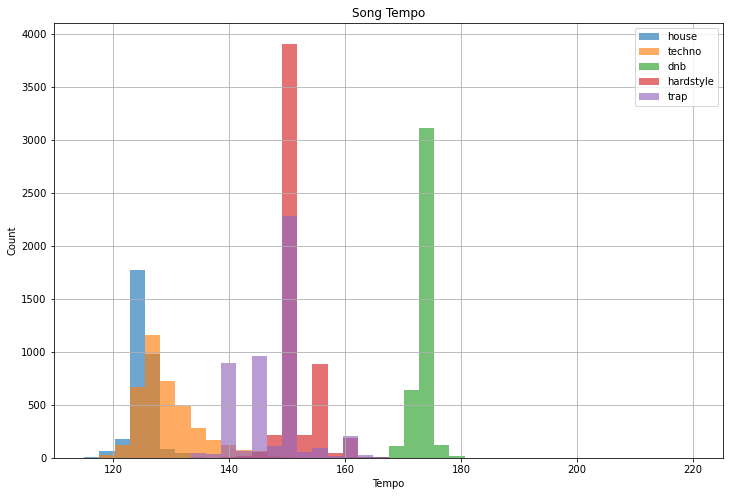

In [33]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo')

for genre in genres:
    graph_tempo(genre, songs)

In [34]:
def sample_songs(df, genres, n):
    result = pd.DataFrame()
    
    for i in range(len(genres)):
        sample = songs[songs['genre'] == genres[i]].sample(n=n)
        result = pd.concat([result, sample], ignore_index=True)
    
    return result

In [35]:
songs = sample_songs(songs, genres, 3000)

In [36]:
# Shape of DataFrame after all cleaning is done
songs_length_final, y0 = songs.shape
print("Shape of the database of extracted songs after removing duplicates:", songs_length_final)
print("Name of Genre and number of songs for the Genre:")
songs_count_final = songs['genre'].value_counts()
print(songs_count_final)

Shape of the database of extracted songs after removing duplicates: 15000
Name of Genre and number of songs for the Genre:
techno       3000
trap         3000
dnb          3000
house        3000
hardstyle    3000
Name: genre, dtype: int64


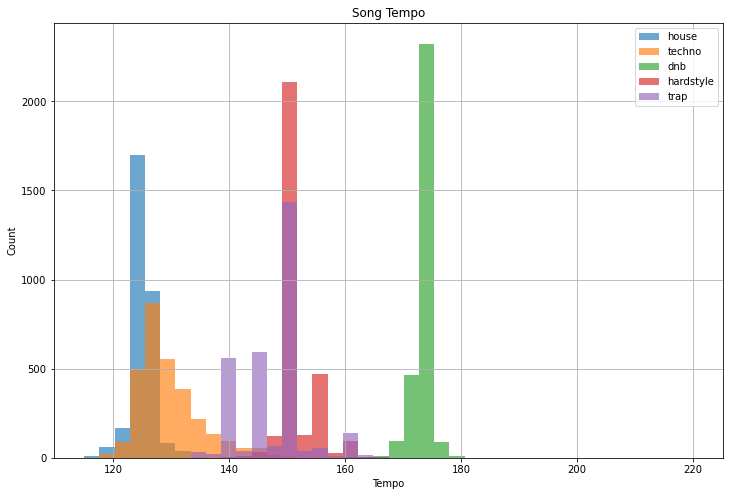

In [37]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo')

for genre in genres:
    graph_tempo(genre, songs)

EXPLORATORY DATA ANALYSIS

In [38]:
# Comparison of Tempo for:
#   - Raw Database 
#   - Database after dropping duplicate and NaN rows
#   - After adjusting tempos

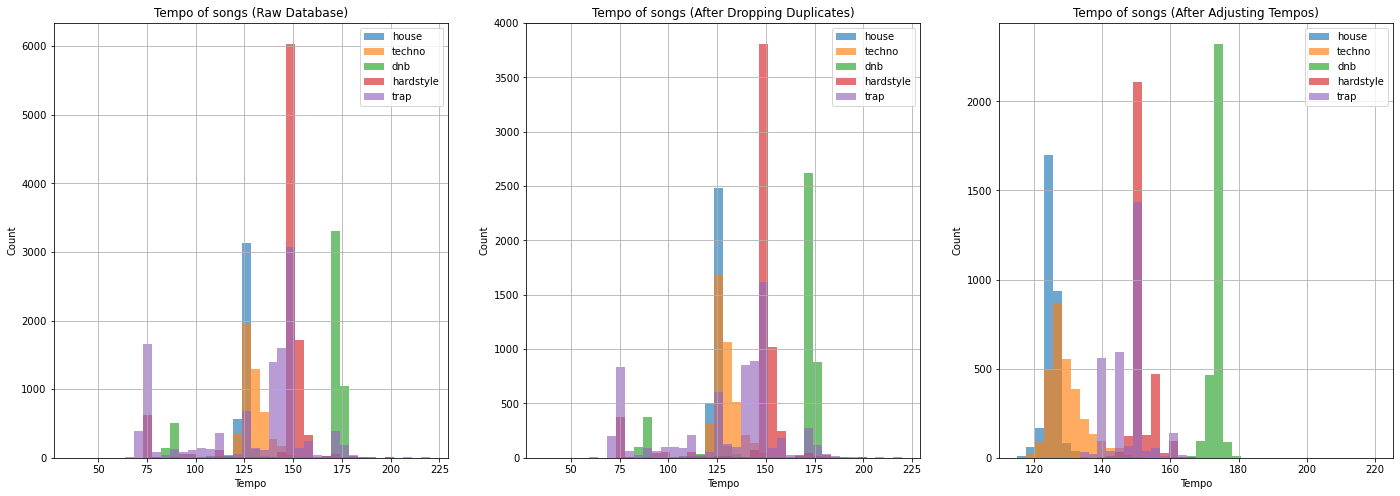

In [39]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.title('Tempo of songs (Raw Database)')

for genre in genres:
    graph_tempo(genre, songs_raw)

plt.subplot(1,3,2)
plt.title('Tempo of songs (After Dropping Duplicates)')

for genre in genres:
    graph_tempo(genre, songs_pref)

plt.subplot(1,3,3)
plt.title('Tempo of songs (After Adjusting Tempos)')

for genre in genres:
    graph_tempo(genre, songs)

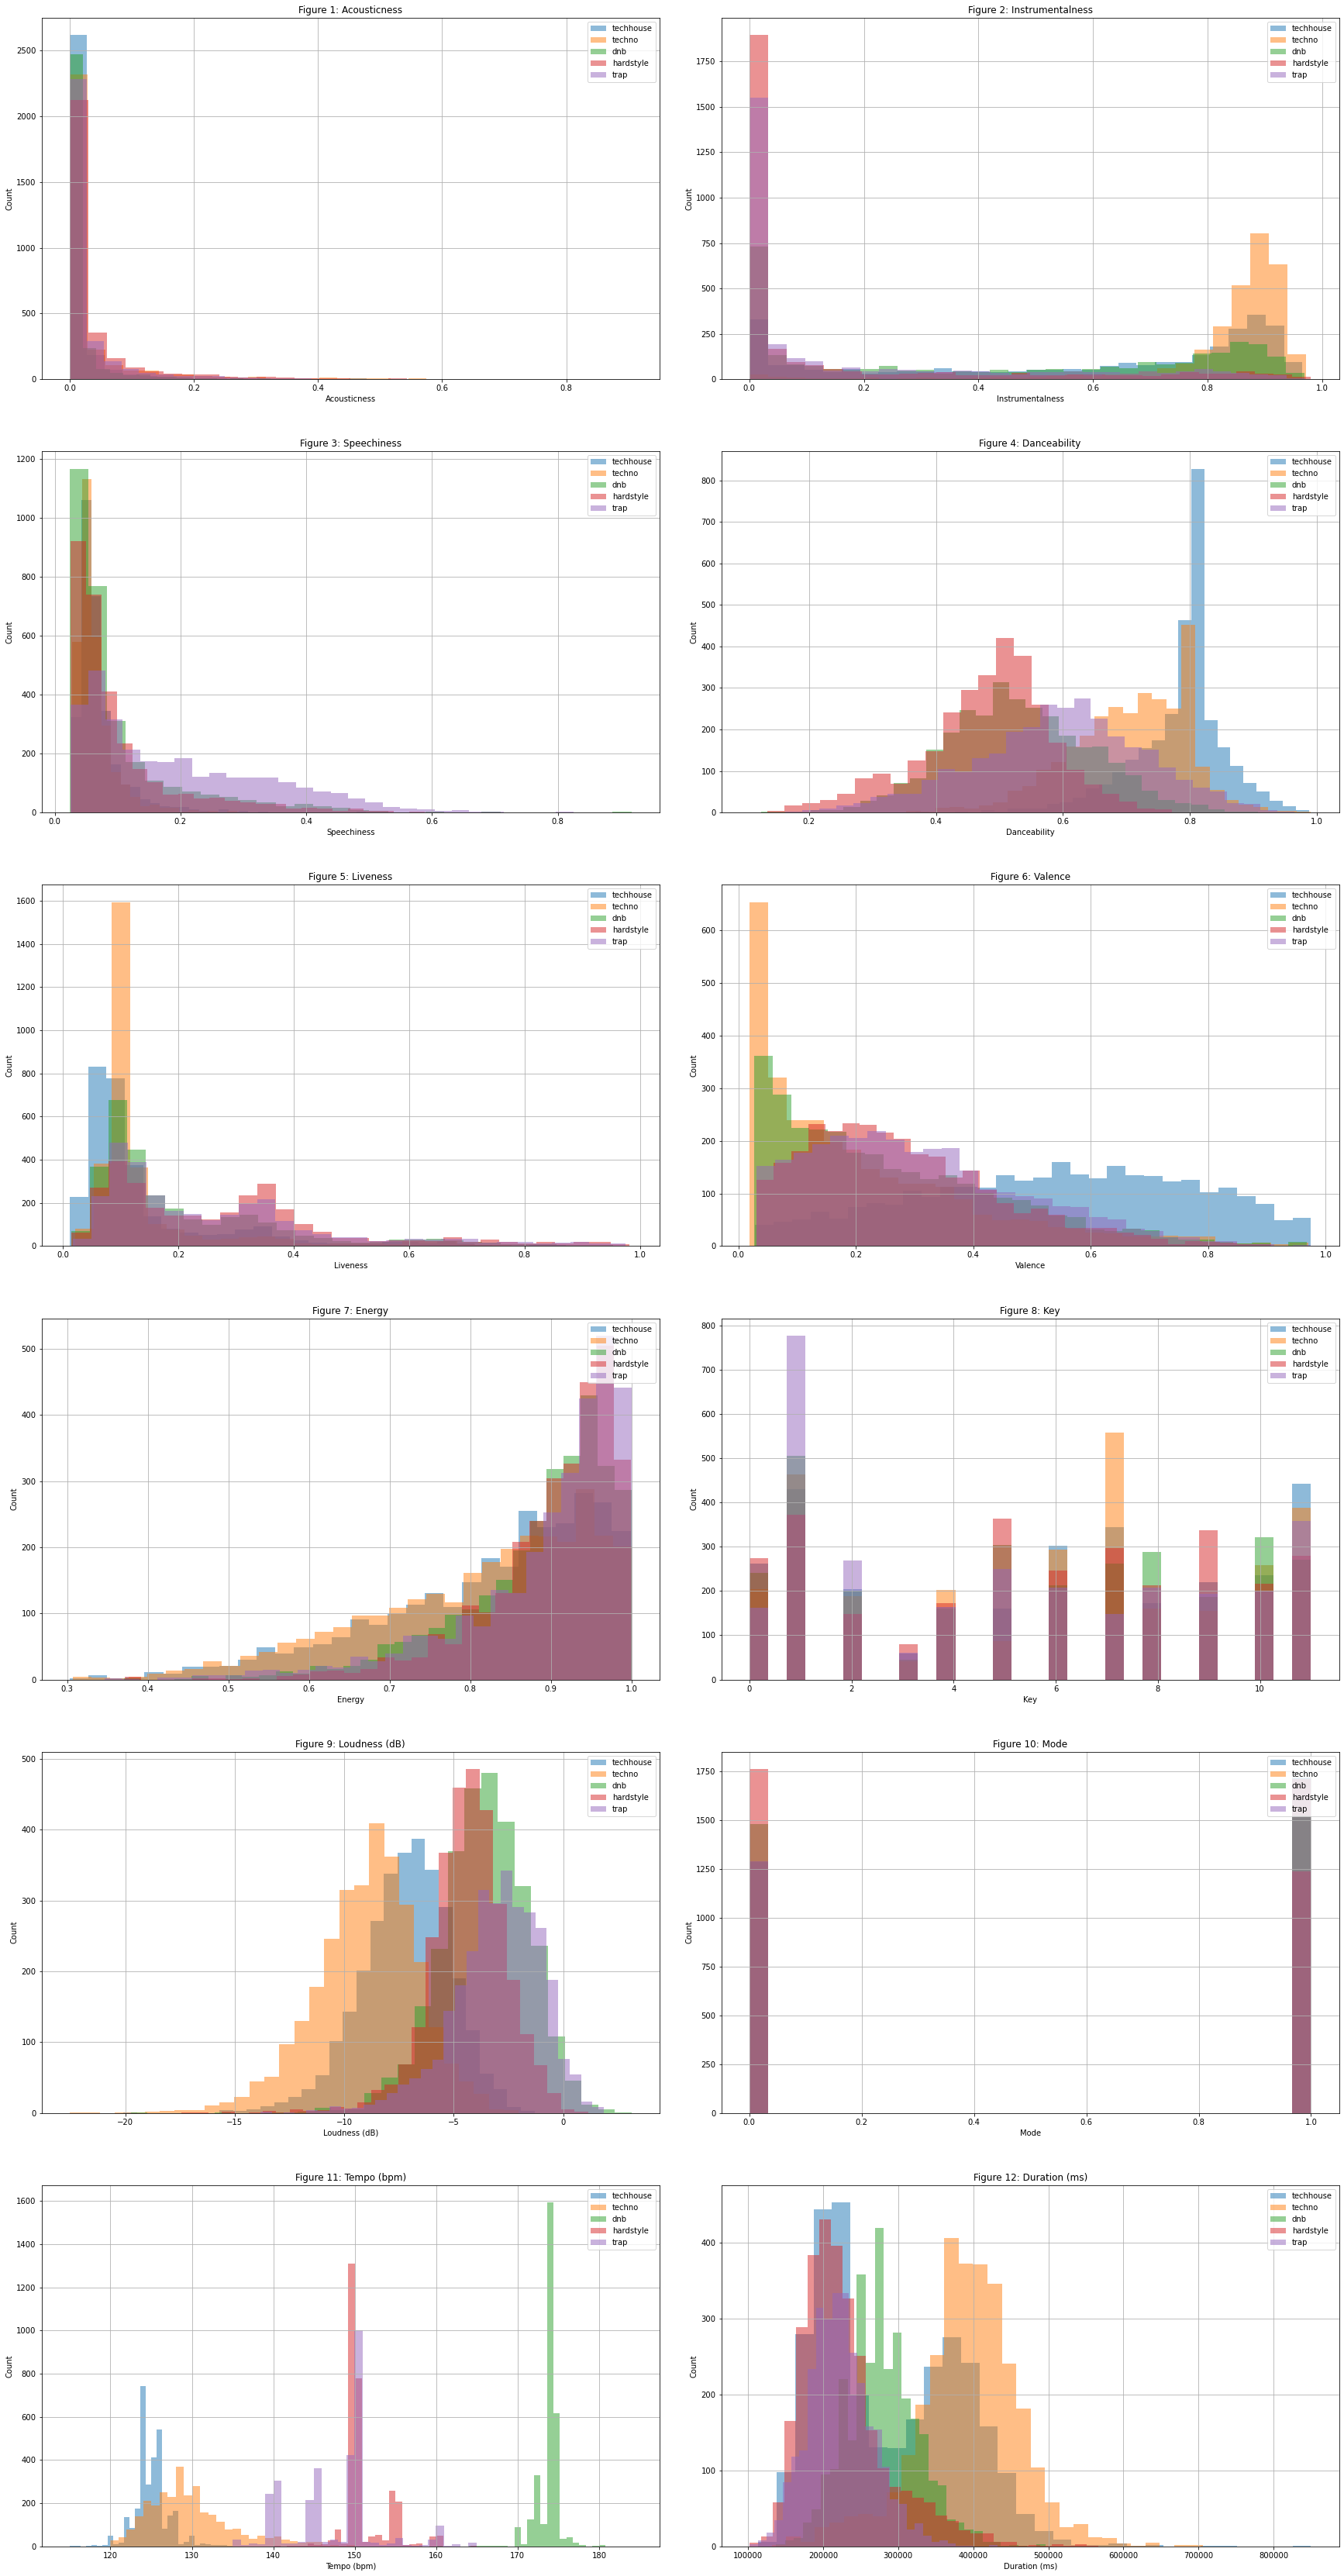

In [40]:
features = ['acousticness', 'instrumentalness', 'speechiness', 'danceability',
           'liveness', 'valence', 'energy', 'key', 'loudness', 'mode', 'tempo', 'duration_ms']

xlabels = ['Acousticness', 'Instrumentalness', 'Speechiness', 'Danceability',
          'Liveness', 'Valence', 'Energy', 'Key', 'Loudness (dB)',
          'Mode', 'Tempo (bpm)', 'Duration (ms)']

fig, axis = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(30,60)
fig.subplots_adjust(wspace=0.1)

ax = np.ravel(axis)

for i,feature in enumerate(features):
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title('Figure {}: {}'.format(i+1, xlabels[i]))
    ax[i].hist(songs[songs['genre'] == 'house'][feature], alpha=0.5, bins=30, label='house')
    ax[i].hist(songs[songs['genre'] == 'techno'][feature], alpha=0.5, bins=30, label='techno')
    ax[i].hist(songs[songs['genre'] == 'dnb'][feature], alpha=0.5, bins=30, label='dnb')
    ax[i].hist(songs[songs['genre'] == 'hardstyle'][feature], alpha=0.5, bins=30, label='hardstyle')
    ax[i].hist(songs[songs['genre'] == 'trap'][feature], alpha=0.5, bins=30, label='trap')    
    ax[i].legend(loc='upper right')
    ax[i].grid(1)

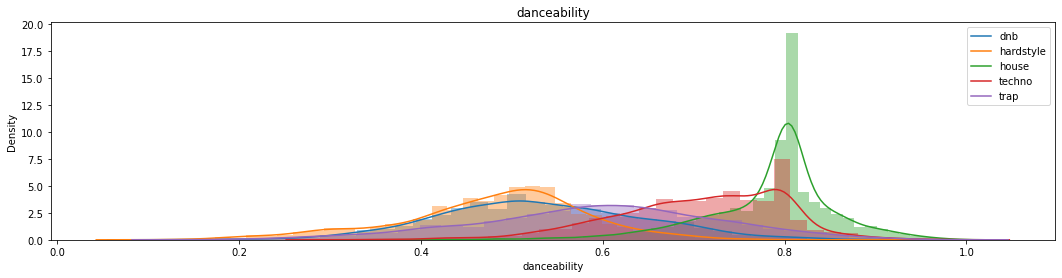

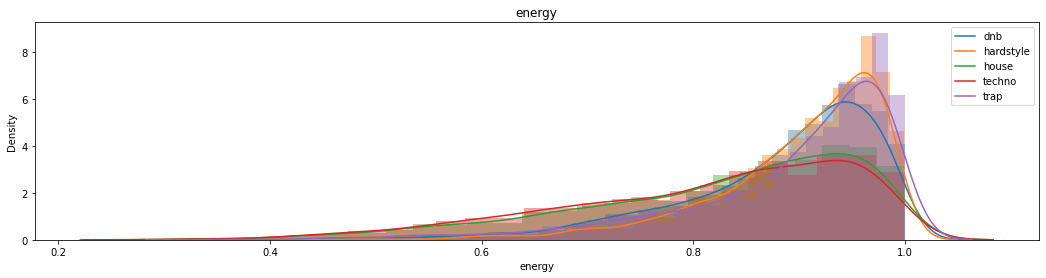

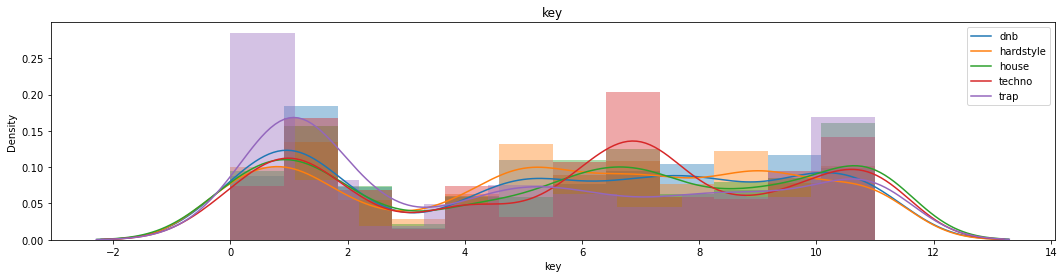

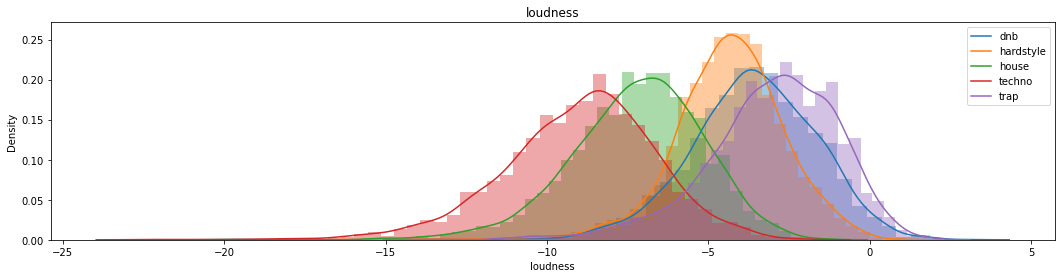

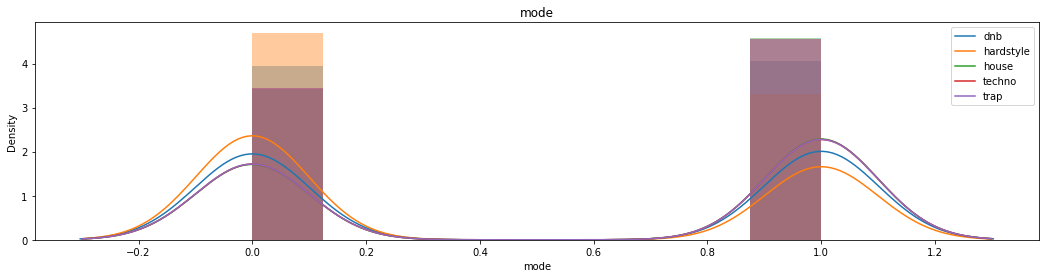

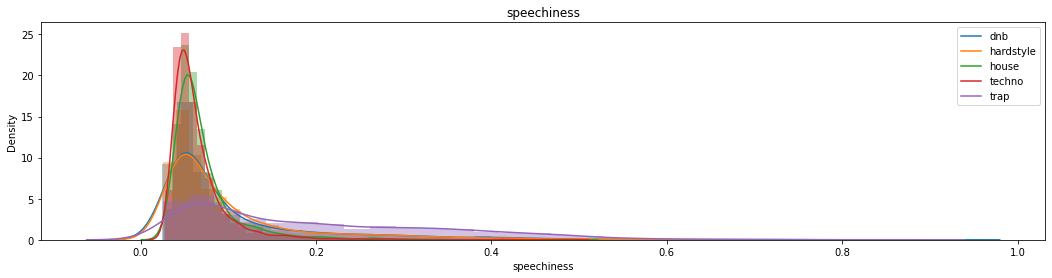

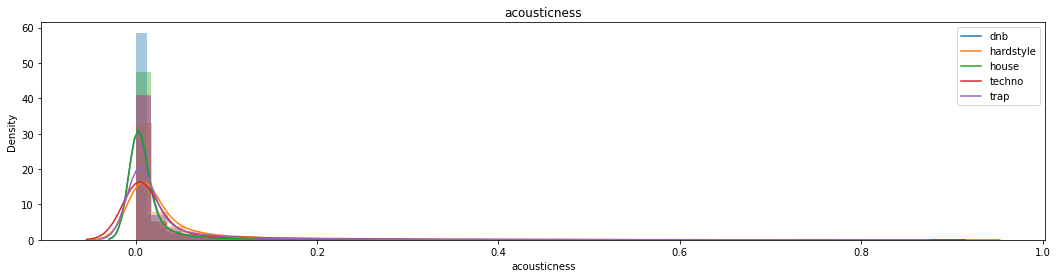

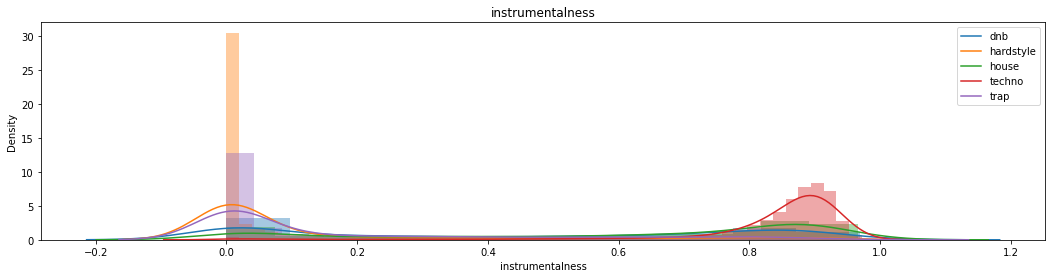

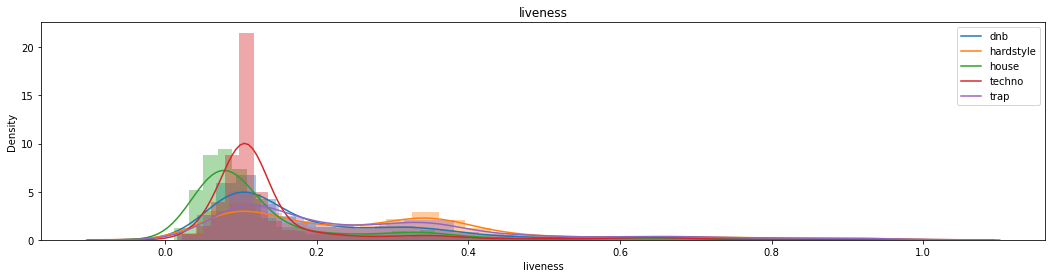

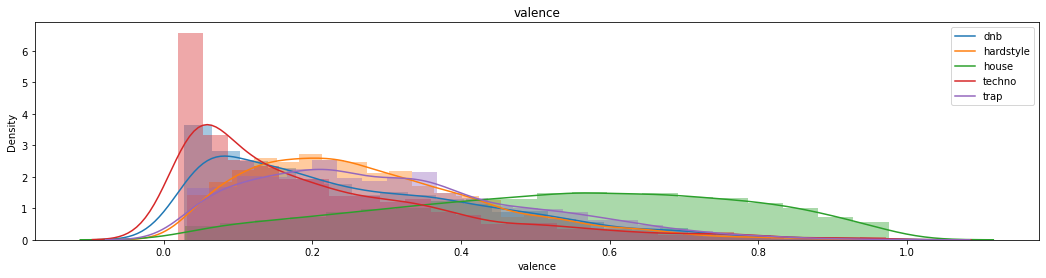

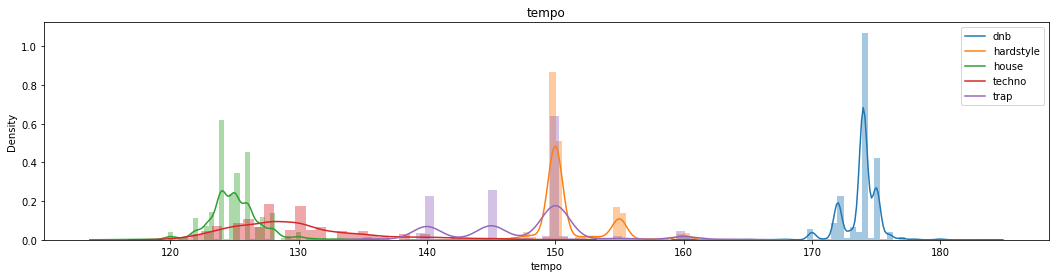

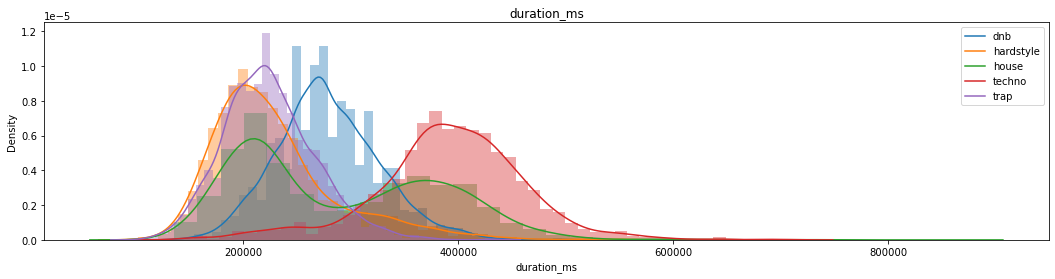

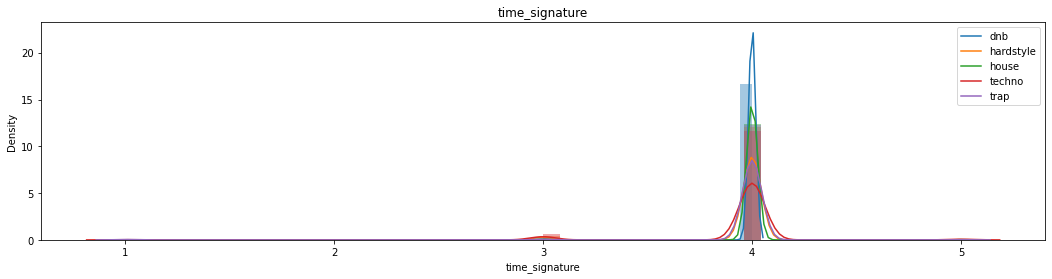

In [41]:
for col in songs.select_dtypes(include='number').columns:
    labels = []
    plt.figure(figsize=(18,4))
    for genre, group in songs.groupby('genre'):
        sns.distplot(group[col])
        labels.append(genre)
    plt.legend(labels)
    plt.title(col)
    plt.show()

In [42]:
# Drop meaningless columns
songs.drop(['analysis_url', 'id', 'track_href', 'type', 'uri'], axis = 1, inplace = True)

In [43]:
songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.806,0.540,1.0,-11.827,1.0,0.0744,0.019500,0.939,0.0411,0.294,125.009,360917.0,4.0,house
1,0.797,0.940,1.0,-5.410,1.0,0.0672,0.000595,0.768,0.5850,0.665,127.002,340158.0,4.0,house
2,0.818,0.847,0.0,-6.282,1.0,0.0989,0.000744,0.806,0.0694,0.689,125.015,430960.0,4.0,house
3,0.785,0.496,2.0,-4.166,1.0,0.0377,0.000040,0.485,0.1000,0.291,125.986,287619.0,4.0,house
4,0.803,0.925,11.0,-6.433,1.0,0.0627,0.000519,0.254,0.0462,0.774,124.006,338200.0,4.0,house


In [44]:
# Saving DataFrame 'songs' as a .csv file
songs.to_csv(r'C:\Users\Chetan\Desktop\College\Python\EDM Sub-genre classifier\songs.csv')